In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [16]:
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem.porter import PorterStemmer
from sklearn.utils import resample

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv(r"/content/drive/MyDrive/train.csv")
db = pd.read_csv(r"/content/drive/MyDrive/test.csv")

# 3. EDA

In [19]:
df.shape

(653061, 3)

In [20]:
df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [21]:
df.head()

,qid,question_text,target
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0


In [22]:
df.tail()

,qid,question_text,target
653056,ad9e82029956889e014e,Which coaching centre is best in Delhi for IAS...,0
653057,a4619bd556d65bf5e52e,Is their any API to check CIBIL score and down...,0
653058,2573a7df05fc8e071aa2,"In paranormal shows, why do spirits talk to me...",0
653059,20e4aeb3ffe5f637ab99,How does Josh Gordon have such well developed ...,0
653060,7e29d8a1f6696b46a52a,In how many ways methane can be extracted?,0


In [23]:
df.describe()

,target
count,653061.00000
mean,0.06187
std,0.24092
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [24]:
df.nunique()

qid              653061
question_text    653061
target                2
dtype: int64

In [25]:
df.groupby('target').describe()

qid                                    question_text          \
         count  unique                   top freq         count  unique   
target                                                                    
0       612656  612656  a3dee568776c08512c89    1        612656  612656   
1        40405   40405  19af3f158b9e37398746    1         40405   40405   

                                                                
                                                      top freq  
target                                                          
0                        What is the role of Lua in Civ4?    1  
1       What stupid things do Indians do when in your ...    1

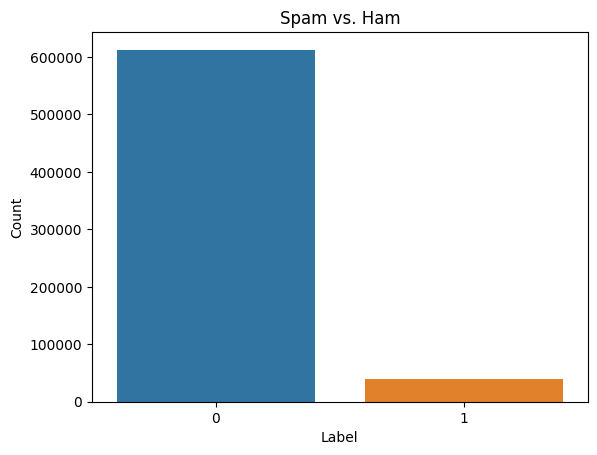

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Spam vs. Ham")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

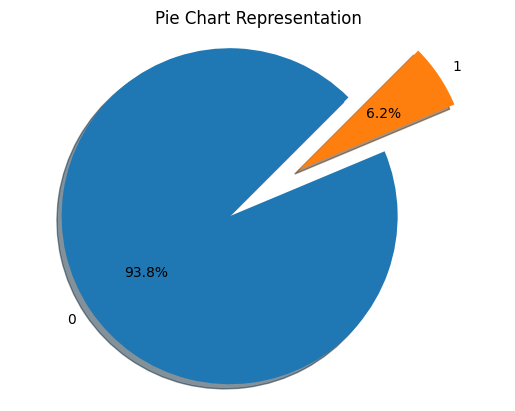

In [34]:
x = df['target'].value_counts()
explode = (0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(x,
       explode=explode,
       labels=x.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=45)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Pie Chart Representation')


plt.show()

In [35]:
df["length"] = df["question_text"].apply(len)
df.sort_values(by = "length", ascending = True).head(10)

,qid,question_text,target,length
306520,527aac2ce6f12f789fe5,"""",1,1
241825,3a9ae962f1094242e36f,If,1,3
644893,0f5a41d6752d5d667895,Is,1,3
333070,2cfd7dec2231e47afd6c,I 12?,0,5
334296,0c2a113858db20e0a4db,Quora:,1,7
580505,4a5c932c3b57957e71c8,Islam:,1,7
606611,6adc80c68b1f75e4540e,India:,1,7
237431,1e52e57a821c597eee0c,Dowry:,1,7
532195,83d01336b3406133723e,Bye Bye?,1,8
73729,955bcd9278b7810cd39a,Incest:,1,8


In [36]:
import plotly.express as px

fig = px.histogram(df, x="length", color="target", color_discrete_sequence=["Green","Red"] )
fig.show()

In [37]:
df.isna().sum()

qid              0
question_text    0
target           0
length           0
dtype: int64

In [38]:
df['word_count'] = df['question_text'].apply(lambda x: len(str(x).split()))

print(df[df['target'] == 1]['word_count'].mean())

print(df[df['target'] == 0]['word_count'].mean())

17.283059027348102
12.505327622678958


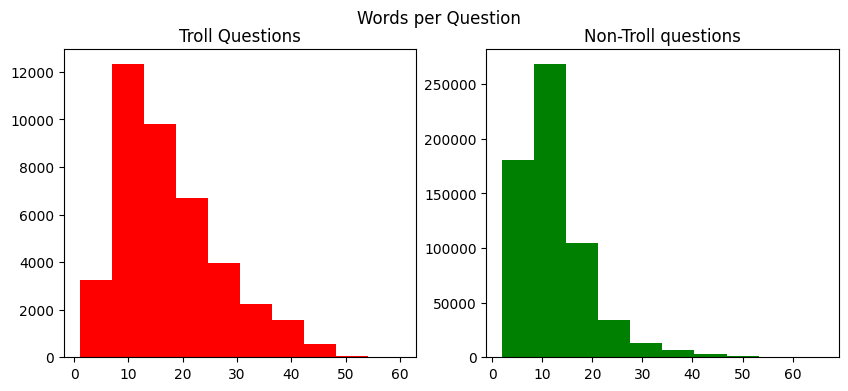

In [39]:
#Plotting Word Count

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

train_words=df[df['target']==1]['word_count']

ax1.hist(train_words,color='Red')

ax1.set_title('Troll Questions')

train_words=df[df['target']==0]['word_count']

ax2.hist(train_words,color='Green')

ax2.set_title('Non-Troll questions')

fig.suptitle('Words per Question')

plt.show()

In [40]:
#Character Count

df['char_count'] = df['question_text'].apply(lambda x: len(str(x)))

print(df[df['target']==1]['char_count'].mean()) #Troll questions

print(df[df['target']==0]['char_count'].mean()) #Non-Troll questions

98.07437198366539
68.86373593011413


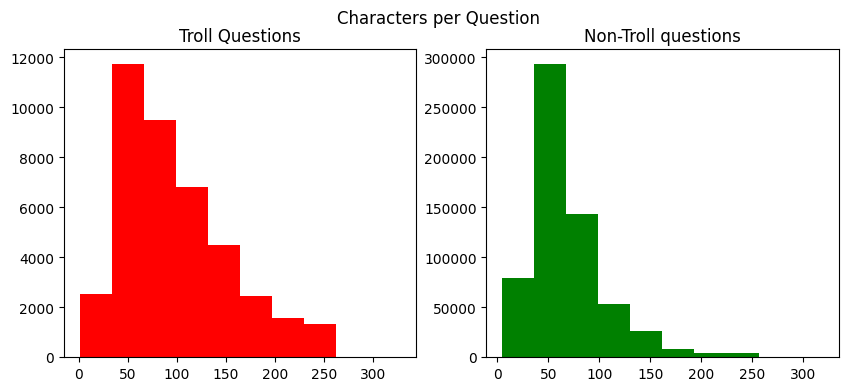

In [41]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

train_words=df[df['target']==1]['length']

ax1.hist(train_words,color='red')

ax1.set_title('Troll Questions')

train_words=df[df['target']==0]['length']

ax2.hist(train_words,color='green')

ax2.set_title('Non-Troll questions')

fig.suptitle('Characters per Question')

plt.show()

# 4. TEXT PREPROCESSING

In [42]:
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
def Tokenize(question):
    question = re.sub("[^a-zA-Z]", " ", question)
    Tokens = nltk.word_tokenize(question)
    return Tokens

df["Tokenized"] = df["question_text"].apply(lambda j: Tokenize(j))
df.head()

,qid,question_text,target,length,word_count,char_count,Tokenized
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0,32,8,32,"[What, is, the, role, of, Lua, in, Civ]"
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0,56,10,56,"[What, are, important, chapters, in, Kannada, ..."
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0,40,6,40,"[Do, musicians, get, royalties, from, YouTube]"
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0,81,11,81,"[What, is, the, difference, between, Scaling, ..."
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0,59,11,59,"[Why, do, elevators, go, super, slow, right, b..."


In [44]:
db["Tokenized"] = db["question_text"].apply(lambda j: Tokenize(j))
db.head()

,qid,question_text,Tokenized
0,0a824224322f0a36025f,Why is my fish tank so cloudy?,"[Why, is, my, fish, tank, so, cloudy]"
1,28af14c4e4777ce1273e,Are AAP supporters/leaders hypocrites?,"[Are, AAP, supporters, leaders, hypocrites]"
2,6892a52c51103dd95044,Can you still get a ticket if you shut off you...,"[Can, you, still, get, a, ticket, if, you, shu..."
3,badd9e8886d73fc1fe4e,Why should any liberal or caring person want t...,"[Why, should, any, liberal, or, caring, person..."
4,4ef178f82a465e4804ae,How can I know who got into my PC using anydesk?,"[How, can, I, know, who, got, into, my, PC, us..."


In [45]:
df['Lower Case'] = df['Tokenized'].apply(lambda s: [word.lower() for word in s])
df.head()

,qid,question_text,target,length,word_count,char_count,Tokenized,Lower Case
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0,32,8,32,"[What, is, the, role, of, Lua, in, Civ]","[what, is, the, role, of, lua, in, civ]"
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0,56,10,56,"[What, are, important, chapters, in, Kannada, ...","[what, are, important, chapters, in, kannada, ..."
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0,40,6,40,"[Do, musicians, get, royalties, from, YouTube]","[do, musicians, get, royalties, from, youtube]"
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0,81,11,81,"[What, is, the, difference, between, Scaling, ...","[what, is, the, difference, between, scaling, ..."
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0,59,11,59,"[Why, do, elevators, go, super, slow, right, b...","[why, do, elevators, go, super, slow, right, b..."


In [46]:
db['Lower Case'] = db['Tokenized'].apply(lambda s: [word.lower() for word in s])
db.head()

,qid,question_text,Tokenized,Lower Case
0,0a824224322f0a36025f,Why is my fish tank so cloudy?,"[Why, is, my, fish, tank, so, cloudy]","[why, is, my, fish, tank, so, cloudy]"
1,28af14c4e4777ce1273e,Are AAP supporters/leaders hypocrites?,"[Are, AAP, supporters, leaders, hypocrites]","[are, aap, supporters, leaders, hypocrites]"
2,6892a52c51103dd95044,Can you still get a ticket if you shut off you...,"[Can, you, still, get, a, ticket, if, you, shu...","[can, you, still, get, a, ticket, if, you, shu..."
3,badd9e8886d73fc1fe4e,Why should any liberal or caring person want t...,"[Why, should, any, liberal, or, caring, person...","[why, should, any, liberal, or, caring, person..."
4,4ef178f82a465e4804ae,How can I know who got into my PC using anydesk?,"[How, can, I, know, who, got, into, my, PC, us...","[how, can, i, know, who, got, into, my, pc, us..."


In [47]:
Unwanted = set(stopwords.words('english'))
#Unwanted = nltk.corpus.stopwords.words("english")

def RemoveStopWords(Tokens):
    NoStopWords = [word for word in Tokens if word not in Unwanted]
    return NoStopWords

df["Removed StopWords"] = df["Lower Case"].apply(lambda k: RemoveStopWords(k))
df.head()

,qid,question_text,target,length,word_count,char_count,Tokenized,Lower Case,Removed StopWords
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0,32,8,32,"[What, is, the, role, of, Lua, in, Civ]","[what, is, the, role, of, lua, in, civ]","[role, lua, civ]"
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0,56,10,56,"[What, are, important, chapters, in, Kannada, ...","[what, are, important, chapters, in, kannada, ...","[important, chapters, kannada, icse]"
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0,40,6,40,"[Do, musicians, get, royalties, from, YouTube]","[do, musicians, get, royalties, from, youtube]","[musicians, get, royalties, youtube]"
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0,81,11,81,"[What, is, the, difference, between, Scaling, ...","[what, is, the, difference, between, scaling, ...","[difference, scaling, social, enterprises, soc..."
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0,59,11,59,"[Why, do, elevators, go, super, slow, right, b...","[why, do, elevators, go, super, slow, right, b...","[elevators, go, super, slow, right, doors, open]"


In [48]:
db["Removed StopWords"] = db["Lower Case"].apply(lambda k: RemoveStopWords(k))
db.head()

,qid,question_text,Tokenized,Lower Case,Removed StopWords
0,0a824224322f0a36025f,Why is my fish tank so cloudy?,"[Why, is, my, fish, tank, so, cloudy]","[why, is, my, fish, tank, so, cloudy]","[fish, tank, cloudy]"
1,28af14c4e4777ce1273e,Are AAP supporters/leaders hypocrites?,"[Are, AAP, supporters, leaders, hypocrites]","[are, aap, supporters, leaders, hypocrites]","[aap, supporters, leaders, hypocrites]"
2,6892a52c51103dd95044,Can you still get a ticket if you shut off you...,"[Can, you, still, get, a, ticket, if, you, shu...","[can, you, still, get, a, ticket, if, you, shu...","[still, get, ticket, shut, car, cop, flips, li..."
3,badd9e8886d73fc1fe4e,Why should any liberal or caring person want t...,"[Why, should, any, liberal, or, caring, person...","[why, should, any, liberal, or, caring, person...","[liberal, caring, person, want, stay, country,..."
4,4ef178f82a465e4804ae,How can I know who got into my PC using anydesk?,"[How, can, I, know, who, got, into, my, PC, us...","[how, can, i, know, who, got, into, my, pc, us...","[know, got, pc, using, anydesk]"


In [49]:
ps = nltk.PorterStemmer()

def stemming(SmallCaps):
    stem = [ps.stem(word) for word in SmallCaps]
    return stem

df["Stemmed Text"] = df["Removed StopWords"].apply(lambda st: stemming(st))
df.head()

,qid,question_text,target,length,word_count,char_count,Tokenized,Lower Case,Removed StopWords,Stemmed Text
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0,32,8,32,"[What, is, the, role, of, Lua, in, Civ]","[what, is, the, role, of, lua, in, civ]","[role, lua, civ]","[role, lua, civ]"
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0,56,10,56,"[What, are, important, chapters, in, Kannada, ...","[what, are, important, chapters, in, kannada, ...","[important, chapters, kannada, icse]","[import, chapter, kannada, ics]"
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0,40,6,40,"[Do, musicians, get, royalties, from, YouTube]","[do, musicians, get, royalties, from, youtube]","[musicians, get, royalties, youtube]","[musician, get, royalti, youtub]"
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0,81,11,81,"[What, is, the, difference, between, Scaling, ...","[what, is, the, difference, between, scaling, ...","[difference, scaling, social, enterprises, soc...","[differ, scale, social, enterpris, social, fra..."
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0,59,11,59,"[Why, do, elevators, go, super, slow, right, b...","[why, do, elevators, go, super, slow, right, b...","[elevators, go, super, slow, right, doors, open]","[elev, go, super, slow, right, door, open]"


In [50]:
db["Stemmed Text"] = db["Removed StopWords"].apply(lambda st: stemming(st))
db.head()

,qid,question_text,Tokenized,Lower Case,Removed StopWords,Stemmed Text
0,0a824224322f0a36025f,Why is my fish tank so cloudy?,"[Why, is, my, fish, tank, so, cloudy]","[why, is, my, fish, tank, so, cloudy]","[fish, tank, cloudy]","[fish, tank, cloudi]"
1,28af14c4e4777ce1273e,Are AAP supporters/leaders hypocrites?,"[Are, AAP, supporters, leaders, hypocrites]","[are, aap, supporters, leaders, hypocrites]","[aap, supporters, leaders, hypocrites]","[aap, support, leader, hypocrit]"
2,6892a52c51103dd95044,Can you still get a ticket if you shut off you...,"[Can, you, still, get, a, ticket, if, you, shu...","[can, you, still, get, a, ticket, if, you, shu...","[still, get, ticket, shut, car, cop, flips, li...","[still, get, ticket, shut, car, cop, flip, light]"
3,badd9e8886d73fc1fe4e,Why should any liberal or caring person want t...,"[Why, should, any, liberal, or, caring, person...","[why, should, any, liberal, or, caring, person...","[liberal, caring, person, want, stay, country,...","[liber, care, person, want, stay, countri, nin..."
4,4ef178f82a465e4804ae,How can I know who got into my PC using anydesk?,"[How, can, I, know, who, got, into, my, PC, us...","[how, can, i, know, who, got, into, my, pc, us...","[know, got, pc, using, anydesk]","[know, got, pc, use, anydesk]"


In [51]:
wnl = nltk.WordNetLemmatizer()

def Lemmatizing(stemmed):
    lemm = [wnl.lemmatize(word) for word in stemmed]
    string = ""
    for s in lemm:
        string = string + ' ' + s
    return string


df["Lemmatized Text"] = df["Stemmed Text"].apply(lambda lm: Lemmatizing(lm))
df.head()

,qid,question_text,target,length,word_count,char_count,Tokenized,Lower Case,Removed StopWords,Stemmed Text,Lemmatized Text
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0,32,8,32,"[What, is, the, role, of, Lua, in, Civ]","[what, is, the, role, of, lua, in, civ]","[role, lua, civ]","[role, lua, civ]",role lua civ
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0,56,10,56,"[What, are, important, chapters, in, Kannada, ...","[what, are, important, chapters, in, kannada, ...","[important, chapters, kannada, icse]","[import, chapter, kannada, ics]",import chapter kannada ic
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0,40,6,40,"[Do, musicians, get, royalties, from, YouTube]","[do, musicians, get, royalties, from, youtube]","[musicians, get, royalties, youtube]","[musician, get, royalti, youtub]",musician get royalti youtub
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0,81,11,81,"[What, is, the, difference, between, Scaling, ...","[what, is, the, difference, between, scaling, ...","[difference, scaling, social, enterprises, soc...","[differ, scale, social, enterpris, social, fra...",differ scale social enterpris social franchis
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0,59,11,59,"[Why, do, elevators, go, super, slow, right, b...","[why, do, elevators, go, super, slow, right, b...","[elevators, go, super, slow, right, doors, open]","[elev, go, super, slow, right, door, open]",elev go super slow right door open


In [52]:
db["Lemmatized Text"] = db["Stemmed Text"].apply(lambda lm: Lemmatizing(lm))
db.head()

,qid,question_text,Tokenized,Lower Case,Removed StopWords,Stemmed Text,Lemmatized Text
0,0a824224322f0a36025f,Why is my fish tank so cloudy?,"[Why, is, my, fish, tank, so, cloudy]","[why, is, my, fish, tank, so, cloudy]","[fish, tank, cloudy]","[fish, tank, cloudi]",fish tank cloudi
1,28af14c4e4777ce1273e,Are AAP supporters/leaders hypocrites?,"[Are, AAP, supporters, leaders, hypocrites]","[are, aap, supporters, leaders, hypocrites]","[aap, supporters, leaders, hypocrites]","[aap, support, leader, hypocrit]",aap support leader hypocrit
2,6892a52c51103dd95044,Can you still get a ticket if you shut off you...,"[Can, you, still, get, a, ticket, if, you, shu...","[can, you, still, get, a, ticket, if, you, shu...","[still, get, ticket, shut, car, cop, flips, li...","[still, get, ticket, shut, car, cop, flip, light]",still get ticket shut car cop flip light
3,badd9e8886d73fc1fe4e,Why should any liberal or caring person want t...,"[Why, should, any, liberal, or, caring, person...","[why, should, any, liberal, or, caring, person...","[liberal, caring, person, want, stay, country,...","[liber, care, person, want, stay, countri, nin...",liber care person want stay countri nine mont...
4,4ef178f82a465e4804ae,How can I know who got into my PC using anydesk?,"[How, can, I, know, who, got, into, my, PC, us...","[how, can, i, know, who, got, into, my, pc, us...","[know, got, pc, using, anydesk]","[know, got, pc, use, anydesk]",know got pc use anydesk


In [53]:
df['text'] = df['Lemmatized Text']

In [54]:
db['text'] = db['Lemmatized Text']

In [55]:
df

,qid,question_text,target,length,word_count,char_count,Tokenized,Lower Case,Removed StopWords,Stemmed Text,Lemmatized Text,text
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0,32,8,32,"[What, is, the, role, of, Lua, in, Civ]","[what, is, the, role, of, lua, in, civ]","[role, lua, civ]","[role, lua, civ]",role lua civ,role lua civ
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0,56,10,56,"[What, are, important, chapters, in, Kannada, ...","[what, are, important, chapters, in, kannada, ...","[important, chapters, kannada, icse]","[import, chapter, kannada, ics]",import chapter kannada ic,import chapter kannada ic
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0,40,6,40,"[Do, musicians, get, royalties, from, YouTube]","[do, musicians, get, royalties, from, youtube]","[musicians, get, royalties, youtube]","[musician, get, royalti, youtub]",musician get royalti youtub,musician get royalti youtub
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0,81,11,81,"[What, is, the, difference, between, Scaling, ...","[what, is, the, difference, between, scaling, ...","[difference, scaling, social, enterprises, soc...","[differ, scale, social, enterpris, social, fra...",differ scale social enterpris social franchis,differ scale social enterpris social franchis
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0,59,11,59,"[Why, do, elevators, go, super, slow, right, b...","[why, do, elevators, go, super, slow, right, b...","[elevators, go, super, slow, right, doors, open]","[elev, go, super, slow, right, door, open]",elev go super slow right door open,elev go super slow right door open
...,...,...,...,...,...,...,...,...,...,...,...,...
653056,ad9e82029956889e014e,Which coaching centre is best in Delhi for IAS...,0,59,10,59,"[Which, coaching, centre, is, best, in, Delhi,...","[which, coaching, centre, is, best, in, delhi,...","[coaching, centre, best, delhi, ias, preparation]","[coach, centr, best, delhi, ia, prepar]",coach centr best delhi ia prepar,coach centr best delhi ia prepar
653057,a4619bd556d65bf5e52e,Is their any API to check CIBIL score and down...,0,74,14,74,"[Is, their, any, API, to, check, CIBIL, score,...","[is, their, any, api, to, check, cibil, score,...","[api, check, cibil, score, download, credit, r...","[api, check, cibil, score, download, credit, r...",api check cibil score download credit report ...,api check cibil score download credit report ...
653058,2573a7df05fc8e071aa2,"In paranormal shows, why do spirits talk to me...",0,82,14,82,"[In, paranormal, shows, why, do, spirits, talk...","[in, paranormal, shows, why, do, spirits, talk...","[paranormal, shows, spirits, talk, mediums, us...","[paranorm, show, spirit, talk, medium, use, im...",paranorm show spirit talk medium use imag ins...,paranorm show spirit talk medium use imag ins...
653059,20e4aeb3ffe5f637ab99,How does Josh Gordon have such well developed ...,0,50,9,50,"[How, does, Josh, Gordon, have, such, well, de...","[how, does, josh, gordon, have, such, well, de...","[josh, gordon, well, developed, abs]","[josh, gordon, well, develop, ab]",josh gordon well develop ab,josh gordon well develop ab


In [56]:
db

,qid,question_text,Tokenized,Lower Case,Removed StopWords,Stemmed Text,Lemmatized Text,text
0,0a824224322f0a36025f,Why is my fish tank so cloudy?,"[Why, is, my, fish, tank, so, cloudy]","[why, is, my, fish, tank, so, cloudy]","[fish, tank, cloudy]","[fish, tank, cloudi]",fish tank cloudi,fish tank cloudi
1,28af14c4e4777ce1273e,Are AAP supporters/leaders hypocrites?,"[Are, AAP, supporters, leaders, hypocrites]","[are, aap, supporters, leaders, hypocrites]","[aap, supporters, leaders, hypocrites]","[aap, support, leader, hypocrit]",aap support leader hypocrit,aap support leader hypocrit
2,6892a52c51103dd95044,Can you still get a ticket if you shut off you...,"[Can, you, still, get, a, ticket, if, you, shu...","[can, you, still, get, a, ticket, if, you, shu...","[still, get, ticket, shut, car, cop, flips, li...","[still, get, ticket, shut, car, cop, flip, light]",still get ticket shut car cop flip light,still get ticket shut car cop flip light
3,badd9e8886d73fc1fe4e,Why should any liberal or caring person want t...,"[Why, should, any, liberal, or, caring, person...","[why, should, any, liberal, or, caring, person...","[liberal, caring, person, want, stay, country,...","[liber, care, person, want, stay, countri, nin...",liber care person want stay countri nine mont...,liber care person want stay countri nine mont...
4,4ef178f82a465e4804ae,How can I know who got into my PC using anydesk?,"[How, can, I, know, who, got, into, my, PC, us...","[how, can, i, know, who, got, into, my, pc, us...","[know, got, pc, using, anydesk]","[know, got, pc, use, anydesk]",know got pc use anydesk,know got pc use anydesk
...,...,...,...,...,...,...,...,...
653056,c2a1f06f34b81ebf46b0,Can we directly apply for Facebook market spec...,"[Can, we, directly, apply, for, Facebook, mark...","[can, we, directly, apply, for, facebook, mark...","[directly, apply, facebook, market, specialist...","[directli, appli, facebook, market, specialist...",directli appli facebook market specialist hyd...,directli appli facebook market specialist hyd...
653057,1062e8840a6d64d3d638,What we do to remind physics concept?,"[What, we, do, to, remind, physics, concept]","[what, we, do, to, remind, physics, concept]","[remind, physics, concept]","[remind, physic, concept]",remind physic concept,remind physic concept
653058,785bc805f28073e7f4a3,Is rooting Lenovo A269i safe?,"[Is, rooting, Lenovo, A, i, safe]","[is, rooting, lenovo, a, i, safe]","[rooting, lenovo, safe]","[root, lenovo, safe]",root lenovo safe,root lenovo safe
653059,a0c5dfc967b11c7b3d5b,What is the longest river of India?,"[What, is, the, longest, river, of, India]","[what, is, the, longest, river, of, india]","[longest, river, india]","[longest, river, india]",longest river india,longest river india


In [57]:
# X = df["question_text"]
# labels = df["target"]

# 5. RESAMPLING

In [58]:
hams_zeroes = df[df.target == 0]
spams_ones = df[df.target == 1]

In [59]:
len(hams_zeroes)

612656

In [60]:
len(spams_ones)

40405

In [61]:
# from sklearn.utils import resample

# balanced_df = pd.concat([resample(hams_zeroes, replace=True, n_samples=len(spams_ones)), spams_ones])

In [62]:
Xunb = df["text"]
labels = df["target"]

In [63]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the target variable
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(Xunb.values.reshape(-1, 1), labels)

# Create the balanced DataFrame with undersampled target variable
df_balanced = pd.DataFrame({'text': X_undersampled.flatten(), 'target': y_undersampled})

In [64]:
df_balanced

,text,target
0,book similar mom ami hout emili bush,0
1,british airway british airway stop give bagga...,0
2,ultrafiltr biolog,0
3,rank expect mark jee advanc answer request,0
4,lawyer main focu rich client focu reach goal,0
...,...,...
80805,liber understand differ pollut climat chang,1
80806,unattract averag look men ever get girlfriend...,1
80807,grab aunti boob p,1
80808,girl like treat like sex toy,1


In [65]:
hams_zeroes_balanced = df_balanced[df_balanced.target == 0]
spams_ones_balanced = df_balanced[df_balanced.target == 1]

In [66]:
len(hams_zeroes_balanced)

40405

In [67]:
len(spams_ones_balanced)

40405

In [68]:
X = df_balanced["text"]
labels = df_balanced["target"]

#6. VECTORIZATION

In [71]:
# Step 2: Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)  # Convert text to numerical features
y = labels

# 7. APPLYING MODELS

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [73]:
# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
def predict(model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, pos_label=1)
    recall = recall_score(y_test, predictions, pos_label=1)
    f1 = f1_score(y_test, predictions, pos_label=1)

    model_name = model
    print(model_name, "Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()

In [75]:
import warnings

In [76]:
model = AdaBoostClassifier()
predict(model)

AdaBoostClassifier() Results:
Accuracy: 0.798168543497092
Precision: 0.8587037868582548
Recall: 0.7122284295468653
F1 Score: 0.7786373507057547



In [77]:
model = LogisticRegression()
predict(model)

LogisticRegression() Results:
Accuracy: 0.8649919564410345
Precision: 0.876619212517635
Recall: 0.8485412787088765
F1 Score: 0.8623517537219277



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [78]:
model = MultinomialNB()
predict(model)

MultinomialNB() Results:
Accuracy: 0.8403044177700779
Precision: 0.7962121212121213
Recall: 0.9133457479826195
F1 Score: 0.8507661173749638



In [79]:
model = BernoulliNB()
predict(model)

BernoulliNB() Results:
Accuracy: 0.8622076475683702
Precision: 0.8467396477867682
Recall: 0.8834264432029795
F1 Score: 0.8646940883407255



In [80]:
model = DecisionTreeClassifier()
predict(model)

DecisionTreeClassifier() Results:
Accuracy: 0.8150600173245885
Precision: 0.8130252100840336
Recall: 0.8167597765363128
F1 Score: 0.8148882145290147



In [81]:
model = RandomForestClassifier()
predict(model)

RandomForestClassifier() Results:
Accuracy: 0.8628263828734067
Precision: 0.8408453993460999
Recall: 0.8939788950962135
F1 Score: 0.8665984716288586



In [82]:
model = SGDClassifier()
predict(model)

SGDClassifier() Results:
Accuracy: 0.861712659324341
Precision: 0.8743246719835348
Recall: 0.8438237119801366
F1 Score: 0.8588034620001265



In [83]:
model = SVC()
predict(model)

SVC() Results:
Accuracy: 0.8763766860537062
Precision: 0.8805126272144742
Recall: 0.8700186219739292
F1 Score: 0.8752341701011616



In [84]:
Xt = db["text"]

In [85]:
X_test_tfidf = vectorizer.transform(Xt)

In [86]:
X.shape

(80810, 29608)

In [87]:
X_test_tfidf.shape

(653061, 29608)

In [88]:
result = model.predict(X_test_tfidf)

In [89]:
db["target"] = result

In [90]:
db.drop("text", axis=1, inplace=True)

In [91]:
db

,qid,Tokenized,Lower Case,Removed StopWords,Stemmed Text,Lemmatized Text,text,target
0,0a824224322f0a36025f,"[Why, is, my, fish, tank, so, cloudy]","[why, is, my, fish, tank, so, cloudy]","[fish, tank, cloudy]","[fish, tank, cloudi]",fish tank cloudi,fish tank cloudi,0
1,28af14c4e4777ce1273e,"[Are, AAP, supporters, leaders, hypocrites]","[are, aap, supporters, leaders, hypocrites]","[aap, supporters, leaders, hypocrites]","[aap, support, leader, hypocrit]",aap support leader hypocrit,aap support leader hypocrit,1
2,6892a52c51103dd95044,"[Can, you, still, get, a, ticket, if, you, shu...","[can, you, still, get, a, ticket, if, you, shu...","[still, get, ticket, shut, car, cop, flips, li...","[still, get, ticket, shut, car, cop, flip, light]",still get ticket shut car cop flip light,still get ticket shut car cop flip light,0
3,badd9e8886d73fc1fe4e,"[Why, should, any, liberal, or, caring, person...","[why, should, any, liberal, or, caring, person...","[liberal, caring, person, want, stay, country,...","[liber, care, person, want, stay, countri, nin...",liber care person want stay countri nine mont...,liber care person want stay countri nine mont...,1
4,4ef178f82a465e4804ae,"[How, can, I, know, who, got, into, my, PC, us...","[how, can, i, know, who, got, into, my, pc, us...","[know, got, pc, using, anydesk]","[know, got, pc, use, anydesk]",know got pc use anydesk,know got pc use anydesk,0
...,...,...,...,...,...,...,...,...
653056,c2a1f06f34b81ebf46b0,"[Can, we, directly, apply, for, Facebook, mark...","[can, we, directly, apply, for, facebook, mark...","[directly, apply, facebook, market, specialist...","[directli, appli, facebook, market, specialist...",directli appli facebook market specialist hyd...,directli appli facebook market specialist hyd...,0
653057,1062e8840a6d64d3d638,"[What, we, do, to, remind, physics, concept]","[what, we, do, to, remind, physics, concept]","[remind, physics, concept]","[remind, physic, concept]",remind physic concept,remind physic concept,0
653058,785bc805f28073e7f4a3,"[Is, rooting, Lenovo, A, i, safe]","[is, rooting, lenovo, a, i, safe]","[rooting, lenovo, safe]","[root, lenovo, safe]",root lenovo safe,root lenovo safe,0
653059,a0c5dfc967b11c7b3d5b,"[What, is, the, longest, river, of, India]","[what, is, the, longest, river, of, india]","[longest, river, india]","[longest, river, india]",longest river india,longest river india,0


In [92]:
# # Step 4: Model Training and Evaluation
# models = [
#     LogisticRegression(),
#     MultinomialNB(),
#     BernoulliNB(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     AdaBoostClassifier(),
#     SVC(),
#     SGDClassifier()
# ]

# for model in models:
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)

#     accuracy = accuracy_score(y_test, predictions)
#     precision = precision_score(y_test, predictions, pos_label=1)
#     recall = recall_score(y_test, predictions, pos_label=1)
#     f1 = f1_score(y_test, predictions, pos_label=1)

#     model_name = model.__class__.__name__
#     print(model_name, "Results:")
#     print("Accuracy:", accuracy)
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("F1 Score:", f1)
#     print()

In [93]:
# db.head()

In [94]:
# Xt = db["question_text"]

In [95]:
# vectorizer = TfidfVectorizer()
# Xt = vectorizer.fit_transform(Xt)  # Convert text to numerical features

In [96]:
# X

In [97]:
# Xt

In [98]:
# for i, model in enumerate(models):
#     predictions = model.predict(Xt)
#     column_name = f"predictions_{i}"  # Generate a unique column name for each model

#     db[column_name] = predictions

In [99]:
db

,qid,Tokenized,Lower Case,Removed StopWords,Stemmed Text,Lemmatized Text,text,target
0,0a824224322f0a36025f,"[Why, is, my, fish, tank, so, cloudy]","[why, is, my, fish, tank, so, cloudy]","[fish, tank, cloudy]","[fish, tank, cloudi]",fish tank cloudi,fish tank cloudi,0
1,28af14c4e4777ce1273e,"[Are, AAP, supporters, leaders, hypocrites]","[are, aap, supporters, leaders, hypocrites]","[aap, supporters, leaders, hypocrites]","[aap, support, leader, hypocrit]",aap support leader hypocrit,aap support leader hypocrit,1
2,6892a52c51103dd95044,"[Can, you, still, get, a, ticket, if, you, shu...","[can, you, still, get, a, ticket, if, you, shu...","[still, get, ticket, shut, car, cop, flips, li...","[still, get, ticket, shut, car, cop, flip, light]",still get ticket shut car cop flip light,still get ticket shut car cop flip light,0
3,badd9e8886d73fc1fe4e,"[Why, should, any, liberal, or, caring, person...","[why, should, any, liberal, or, caring, person...","[liberal, caring, person, want, stay, country,...","[liber, care, person, want, stay, countri, nin...",liber care person want stay countri nine mont...,liber care person want stay countri nine mont...,1
4,4ef178f82a465e4804ae,"[How, can, I, know, who, got, into, my, PC, us...","[how, can, i, know, who, got, into, my, pc, us...","[know, got, pc, using, anydesk]","[know, got, pc, use, anydesk]",know got pc use anydesk,know got pc use anydesk,0
...,...,...,...,...,...,...,...,...
653056,c2a1f06f34b81ebf46b0,"[Can, we, directly, apply, for, Facebook, mark...","[can, we, directly, apply, for, facebook, mark...","[directly, apply, facebook, market, specialist...","[directli, appli, facebook, market, specialist...",directli appli facebook market specialist hyd...,directli appli facebook market specialist hyd...,0
653057,1062e8840a6d64d3d638,"[What, we, do, to, remind, physics, concept]","[what, we, do, to, remind, physics, concept]","[remind, physics, concept]","[remind, physic, concept]",remind physic concept,remind physic concept,0
653058,785bc805f28073e7f4a3,"[Is, rooting, Lenovo, A, i, safe]","[is, rooting, lenovo, a, i, safe]","[rooting, lenovo, safe]","[root, lenovo, safe]",root lenovo safe,root lenovo safe,0
653059,a0c5dfc967b11c7b3d5b,"[What, is, the, longest, river, of, India]","[what, is, the, longest, river, of, india]","[longest, river, india]","[longest, river, india]",longest river india,longest river india,0
